In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("manhattan.csv")
df.dropna(inplace = True)
df.drop(df.index[df["bedrooms"] % 1 != 0],inplace=True)
df.reset_index(drop=True,inplace=True)

In [2]:
adj_rent=[]
for i in range(len(df)):
    if df.iat[i,2]==0:
        adj_rent.append(df.iat[i,1])
    else:
        adj_rent.append(df.iat[i,1]/df.iat[i,2])   
df["adjusted rent"]=adj_rent

In [3]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())      

<AxesSubplot:>

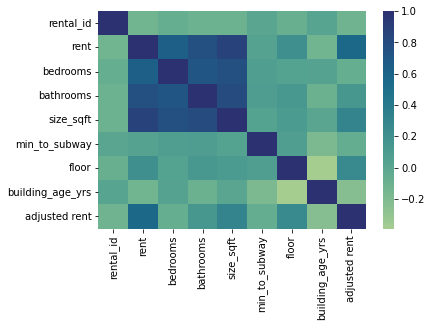

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
cor = df_min_max_scaled.corr()
sns.heatmap(cor, ax=ax,cmap="crest")

In [5]:
def testTrainSplit(data):
    length = len(df_min_max_scaled.index)
    split = int(length*0.7)
    train = data[0:split]
    test = data[split+1:length]
    return train, test
train, test = testTrainSplit(df_min_max_scaled)

In [16]:
#y = b + m1x1 + m2x2 sqaure feet and bedrooms
#y int is 0

def findSumsM1(a,b,c):
    sums=0
    for i in range(0,len(train)-1):
        sums += abs((abs((a*train["size_sqft"][i])+(b*train["rent"][i])+(c))/((a**2+b**2)**0.5)))
    return sums

def getBestSlopeM1(c):
    compSums=[]
    x=0.0
    for i in range(100):
        x += 0.01
        compSums.append(findSumsM1(i,-1,c))
    ret = compSums[0]
    ret1 = 0.0
    for i in range(len(compSums)-1):
        if compSums[i+1]<ret:
            ret = compSums[i+1]
            ret1 = compSums.index(ret)
    return ret1-1.0

def findSumsM2(a,b,c):
    sums=0
    for i in range(0,len(train)-1):
        sums += abs((abs((a*train["bedrooms"][i])+(b*train["rent"][i])+(c))/((a**2+b**2)**0.5)))
    return sums

def getBestSlopeM2(c):
    compSums=[]
    x=0.0
    placehold=[]
    for i in range(100):
        x += 0.01
        compSums.append(findSumsM2(i,-1,c))
        placeHold.append(x)
    ret = compSums[0]
    ret1 = 0.0
    for i in range(len(compSums)-1):
        if compSums[i+1]<ret:
            ret = compSums[i+1]
            ret1 = placeHold[i]
    return ret1-1.0

print(getBestSlopeM1(0))
print(getBestSlopeM2(0))

1.0


NameError: name 'placeHold' is not defined